In [5]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

style.use('ggplot')

In [6]:
start = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)

In [7]:
df = web.DataReader('TSLA', 'yahoo', start, end)

In [8]:
print(df)

                  High         Low        Open       Close    Volume  \
Date                                                                   
2010-06-29   25.000000   17.540001   19.000000   23.889999  18766300   
2010-06-30   30.420000   23.299999   25.790001   23.830000  17187100   
2010-07-01   25.920000   20.270000   25.000000   21.959999   8218800   
2010-07-02   23.100000   18.709999   23.000000   19.200001   5139800   
2010-07-06   20.000000   15.830000   20.000000   16.110001   6866900   
2010-07-07   16.629999   14.980000   16.400000   15.800000   6921700   
2010-07-08   17.520000   15.570000   16.139999   17.459999   7711400   
2010-07-09   17.900000   16.549999   17.580000   17.400000   4050600   
2010-07-12   18.070000   17.000000   17.950001   17.049999   2202500   
2010-07-13   18.639999   16.900000   17.389999   18.139999   2680100   
2010-07-14   20.150000   17.760000   17.940001   19.840000   4195200   
2010-07-15   21.500000   19.000000   19.940001   19.889999   373

In [9]:
# Used pandas_datareader to fetch data within date range from Yahoo finance according 

In [10]:
df.to_csv('tsla.csv')

In [11]:
# Read in csv file and use datetime as index

In [12]:
df = pd.read_csv('tsla.csv', parse_dates = True, index_col = 0)

In [13]:
print(df.head())

             High        Low       Open      Close    Volume  Adj Close
Date                                                                   
2010-06-29  25.00  17.540001  19.000000  23.889999  18766300  23.889999
2010-06-30  30.42  23.299999  25.790001  23.830000  17187100  23.830000
2010-07-01  25.92  20.270000  25.000000  21.959999   8218800  21.959999
2010-07-02  23.10  18.709999  23.000000  19.200001   5139800  19.200001
2010-07-06  20.00  15.830000  20.000000  16.110001   6866900  16.110001


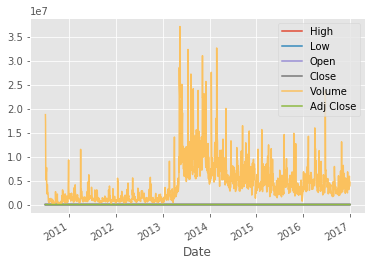

In [14]:
df.plot()

In [15]:
# Show specfic column

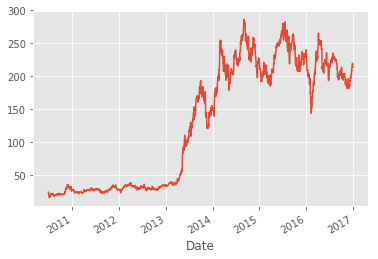

In [16]:
df['Adj Close'].plot()

In [17]:
# Graph multiple columns

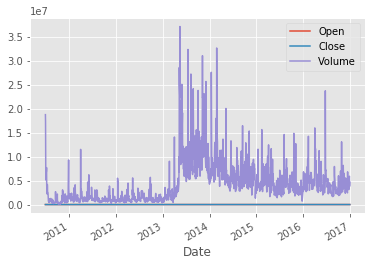

In [18]:
df[['Open', 'Close', 'Volume']].plot()

In [19]:
# Make a new column for moving average

In [20]:
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()

In [21]:
# Drop NA

In [22]:
df.dropna(inplace=True)

In [23]:
print(df.head())

             High        Low       Open      Close    Volume  Adj Close  \
Date                                                                      
2010-06-29  25.00  17.540001  19.000000  23.889999  18766300  23.889999   
2010-06-30  30.42  23.299999  25.790001  23.830000  17187100  23.830000   
2010-07-01  25.92  20.270000  25.000000  21.959999   8218800  21.959999   
2010-07-02  23.10  18.709999  23.000000  19.200001   5139800  19.200001   
2010-07-06  20.00  15.830000  20.000000  16.110001   6866900  16.110001   

                100ma  
Date                   
2010-06-29  23.889999  
2010-06-30  23.860000  
2010-07-01  23.226666  
2010-07-02  22.220000  
2010-07-06  20.998000  


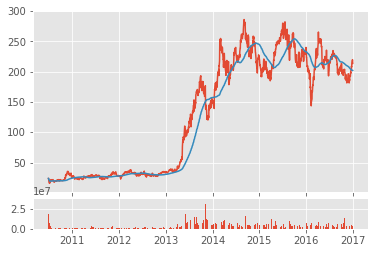

In [29]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])
plt.show()

In [35]:
# Summary statistics across the whole dataFrame

In [36]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close,100ma,crosses_moving_avg
count,1640.000000,1640.000000,1640.000000,1640.000000,1.640000e+03,1640.000000,1640.000000,1639.000000
mean,130.990183,126.264738,128.700585,128.659506,4.236786e+06,128.659506,123.276748,123.228634
std,94.737840,91.842670,93.345356,93.315558,4.337805e+06,93.315558,92.648268,92.656046
min,16.629999,14.980000,16.139999,15.800000,1.185000e+05,15.800000,19.084000,19.084000
25%,30.247500,28.902500,29.742500,29.539999,1.160100e+06,29.539999,29.133100,29.119400
50%,150.354996,142.715004,147.834999,147.425003,3.100800e+06,147.425003,130.272599,129.654599
75%,220.825001,213.607506,217.367504,217.662495,5.620325e+06,217.662495,215.904724,215.906950
max,291.420013,280.399994,287.670013,286.040009,3.716390e+07,286.040009,254.230901,254.230901


In [37]:
# Closing price for the most recent 5 trading days

In [38]:
df['Close'].tail()

Date
2016-12-23    213.339996
2016-12-27    219.529999
2016-12-28    219.740005
2016-12-29    214.679993
2016-12-30    213.690002
Name: Close, dtype: float64

In [39]:
# Volume statistics

In [40]:
vol = df['Volume']
print("Min: %s Max: %s Average: %s" % (vol.min(), vol.max(), vol.mean()))

Min: 118500 Max: 37163900 Average: 4236785.914634147


In [41]:
# Plot historical closing prices and volume

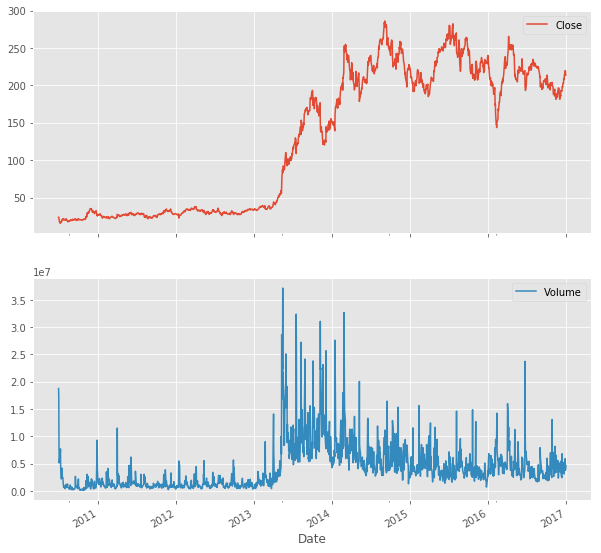

In [44]:
%matplotlib inline

import seaborn as sns

plots = df[['Close', 'Volume']].plot(subplots=True, figsize=(10, 10))

In [45]:
# 50 period moving average of the closing price

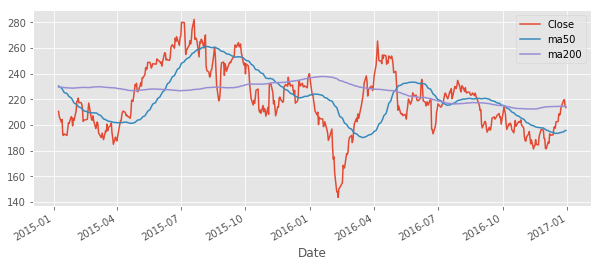

In [46]:
df['ma50'] = df.Close.rolling(window=50).mean()
df['ma200'] = df.Close.rolling(window=200).mean()
data = df[['Close', 'ma50', 'ma200']][-500:]
plots = data.plot(subplots=False,figsize=(10, 4))